In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def parse(string, node=0):
    reG = nx.MultiDiGraph()
    edge_labels = dict()
    n=len(string)
    for i, token in enumerate(string):
        next_node = node+1
        if token == "+":
            continue
        elif token ==  "*":
            continue
        else:
            if i+1<n and string[i+1] == "+":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                reG.add_edge(next_node, next_node)
                edge_labels[(next_node, next_node)] = token
                node+=1
            elif i+1<n and string[i+1] == "*":
                reG.add_edge(node, node)
                edge_labels[(node, node)] = token
            else:
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                node+=1
    return reG, edge_labels

def split_parse(string):
    split_string = string.split('|')
    part_one = split_string[0]
    reG_one, edge_labels_one = parse(part_one)
    last_node = max(list(max(edge_labels_one)))
    start_node = 0
    node = last_node+1
    reG = reG_one
    edge_labels = edge_labels_one
    split_string = split_string[1:]
    for part in split_string: 
        n=len(part)
        for i, token in enumerate(part):
            next_node = node+1
            if i == 0 and n != 1:
                if i+1<n and part[i+1] == "+":
                        reG.add_edge(start_node, next_node)
                        edge_labels[(start_node, next_node)] = token
                        reG.add_edge(next_node, next_node)
                        edge_labels[(next_node, next_node)] = token
                        node+=1
                elif i+1<n and part[i+1] == "*":
                        reG.add_edge(node, node)
                        edge_labels[(node, node)] = token
                        next_node = last_node
                        reG.add_edge(node, last_node)
                        edge_labels[(node, last_node)] = 'e'
                else:
                        reG.add_edge(start_node, next_node)
                        edge_labels[(start_node, next_node)] = token
                        node+=1
            elif i == 0 and n == 1:
                if i+1<n and part[i+1] == "+":
                        reG.add_edge(start_node, last_node)
                        edge_labels[(start_node, last_node)] = token
                        reG.add_edge(last_node, last_node)
                        edge_labels[(last_node, last_node)] = token
                        node+=1
                elif i+1<n and part[i+1] == "*":
                        reG.add_edge(start_node, last_node)
                        edge_labels[(start_node, last_node)] = 'e'
                        reG.add_edge(last_node, last_node)
                        edge_labels[(last_node, last_node)] = token
                else:
                        reG.add_edge(start_node, last_node)
                        edge_labels[(start_node, last_node)] = token
                        node+=1
            elif i != n and i != 0:
                if token == "+":
                    continue
                elif token ==  "*":
                    continue
                else:
                    if i+1<n and part[i+1] == "+":
                        reG.add_edge(node, next_node)
                        edge_labels[(node, next_node)] = token
                        reG.add_edge(next_node, next_node)
                        edge_labels[(next_node, next_node)] = token
                        node+=1
                    elif i+1<n and part[i+1] == "*":
                        reG.add_edge(node, node)
                        edge_labels[(node, node)] = token
                    else:
                        reG.add_edge(node, next_node)
                        edge_labels[(node, next_node)] = token
                        node+=1
            elif i+1<n and part[i+1] == "+" or part[i+1] == "*" and i+1 == n:
                if part[i+1] == "+":
                    reG.add_edge(node, next_node)
                    edge_labels[(node, next_node)] = token
                    reG.add_edge(next_node, next_node)
                    edge_labels[(next_node, next_node)] = token
                    node+=1
                elif part[i+1] == "*":
                    reG.add_edge(node, node)
                    edge_labels[(node, node)] = token
            elif token != "+" and token != "*" and i == n:
                    reG.add_edge(node, last_node)
                    edge_labels[(node, last_node)] = token

    return reG, edge_labels


def irregex(string):
    if "|" in string:
        return split_parse(string)
    else:
        return parse(string)


In [50]:
def is_path_valid(graph, string, end_nodes, start_node=0):
    def neighbors(current_node, index):
        if index == len(string) and current_node in end_nodes:
            return True
        for neighbor in graph[current_node]:
            label = edge_labels.get((current_node, neighbor))
            if label:
                if label == string[index] or string[index] in label:
                    try:
                        if neighbors(neighbor, index + 1):
                            return True
                    except:
                        return False
        return False

    return neighbors(start_node, 0)

In [4]:
def ends(edge_labels):
    normal_nodes = []
    for edge in edge_labels.keys():
        from_node, to_node = edge
        for edge_ in edge_labels.keys():
            from_, to_ = edge_
            if from_ == to_node and to_ != to_node:
                normal_nodes.append(to_node)

    end_nodes = []
    for edge in edge_labels.keys():
        from_node, to_node = edge
        if to_node not in normal_nodes:
            end_nodes.append(to_node)
    
    return end_nodes

In [44]:
reg = "a|bcd|f+"

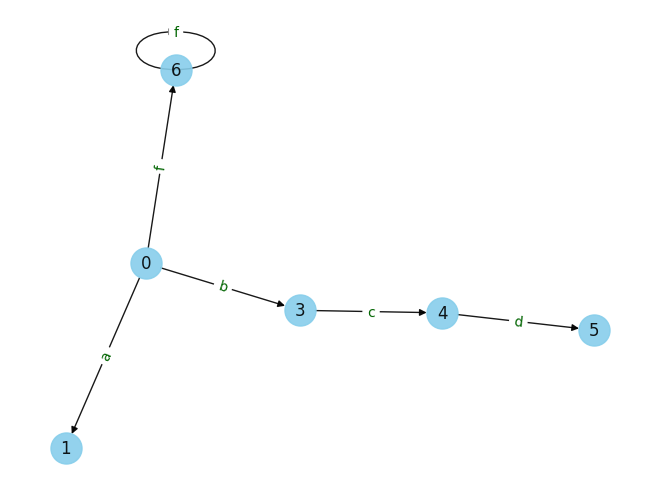

In [48]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [51]:
end_nodes = ends(edge_labels)

test = "bcd"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "fff"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "f"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "a"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "abcdf"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "bcd" под регулярку a|bcd|f+ подходит
Строка "fff" под регулярку a|bcd|f+ подходит
Строка "f" под регулярку a|bcd|f+ подходит
Строка "a" под регулярку a|bcd|f+ подходит
Строка "abcdf" под регулярку a|bcd|f+ НЕ подходит


In [224]:
reg = "a|bcd"

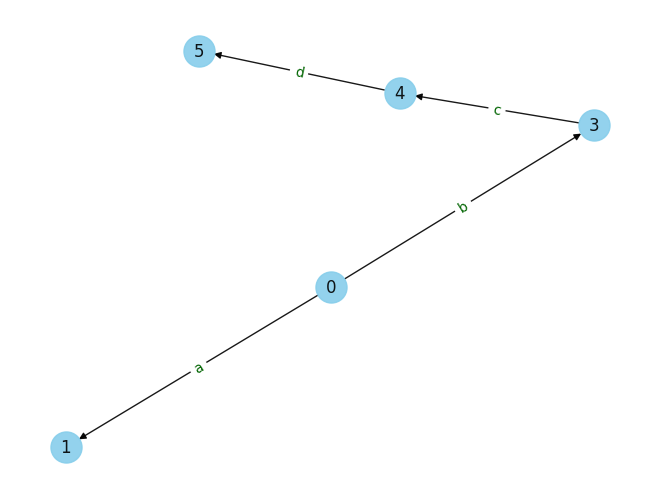

In [225]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [226]:
end_nodes = ends(edge_labels)

test = "acd"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "bcd"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "abcd"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "a"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "acd" под регулярку a|bcd НЕ подходит
Строка "bcd" под регулярку a|bcd подходит
Строка "abcd" под регулярку a|bcd НЕ подходит
Строка "a" под регулярку a|bcd подходит


In [36]:
reg = "bba*b+"

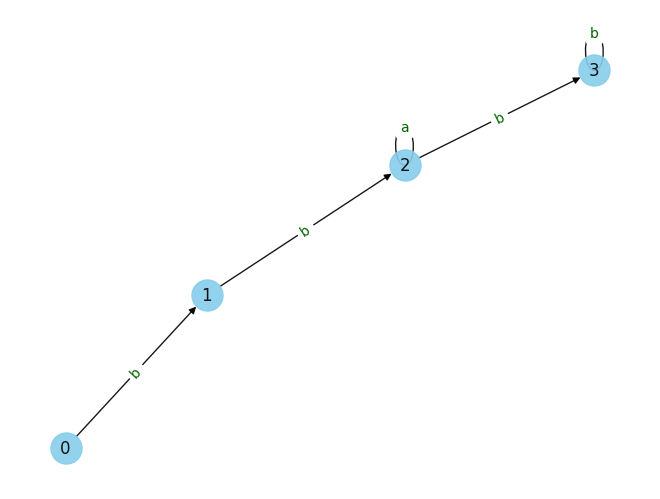

In [37]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [38]:
end_nodes = ends(edge_labels)

test = "bbbbb"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "baaaaabbbb"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "bbaaaaaabbbbbbb"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "bbaaaaaaa"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "bbbbb" под регулярку bba*b+ подходит
Строка "baaaaabbbb" под регулярку bba*b+ НЕ подходит
Строка "bbaaaaaabbbbbbb" под регулярку bba*b+ подходит
Строка "bbaaaaaaa" под регулярку bba*b+ НЕ подходит


In [55]:
reg = "ab*|a+"

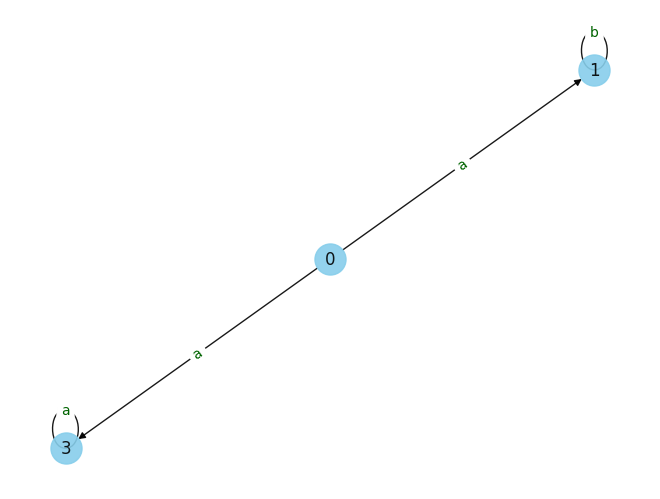

In [56]:
G, edge_labels = irregex(reg)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen'
)
plt.axis('off')
plt.show()

In [59]:
end_nodes = ends(edge_labels)

test = "aba"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "aaaaa"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "a"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')
test = "abbbbbb"
result = is_path_valid(G, test, end_nodes)
print(f'Строка "{test}" под регулярку {reg} {"подходит" if result else "НЕ подходит"}')

Строка "aba" под регулярку ab*|a+ НЕ подходит
Строка "aaaaa" под регулярку ab*|a+ подходит
Строка "a" под регулярку ab*|a+ подходит
Строка "abbbbbb" под регулярку ab*|a+ подходит
